In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%reload_ext autoreload
%autoreload 2

# import your code
from lab2 import (apply_filter,build_gaussian_kernel,double_thresholding,non_maximum_suppression,sobel_edge_detection,)


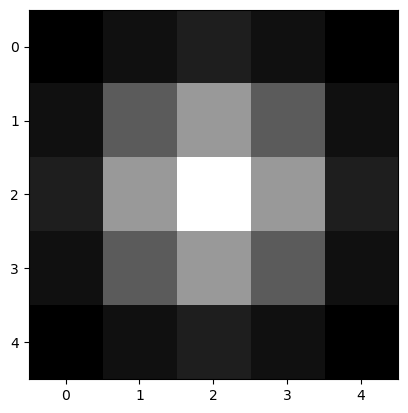

In [3]:
kernel = build_gaussian_kernel(5, 1)
plt.imshow(kernel, cmap="gray")

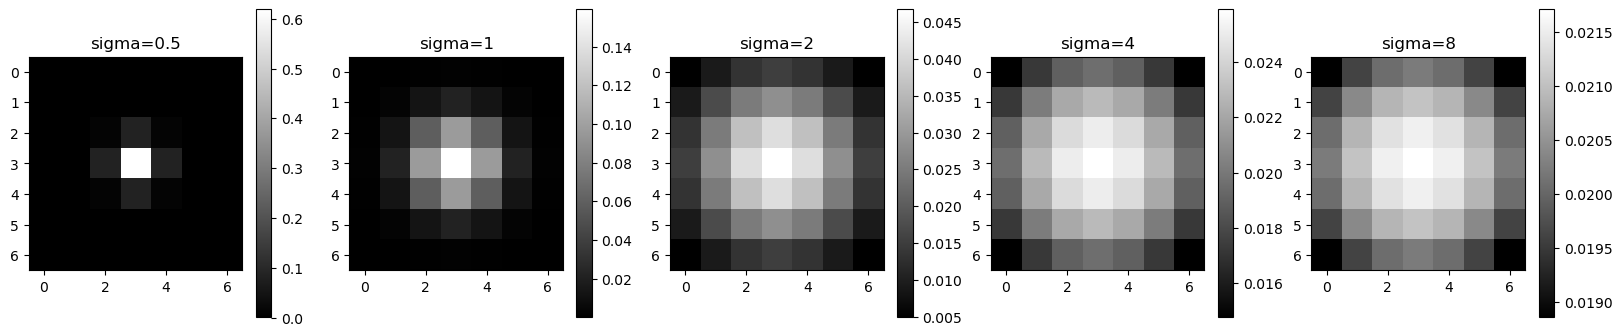

In [4]:
size = 7
sigmas = [0.5, 1, 2, 4, 8]
plt.figure(figsize=(20, 4))
for i, sigma in enumerate(sigmas):
    kernel = build_gaussian_kernel(7, sigma)
    plt.subplot(1, 5, i + 1)
    plt.imshow(kernel, cmap="gray")
    plt.title(f"sigma={sigma}")
    plt.colorbar()

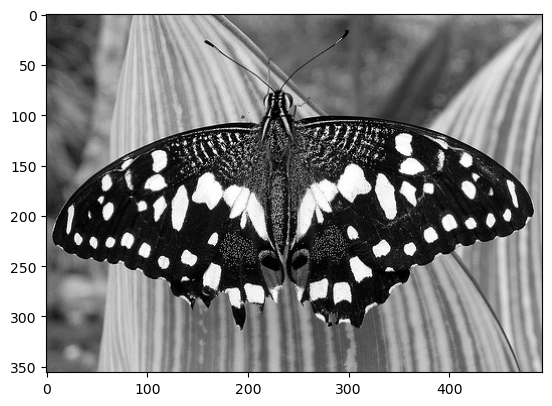

In [5]:
gray_img = cv2.imread("butterfly.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_img, cmap="gray")

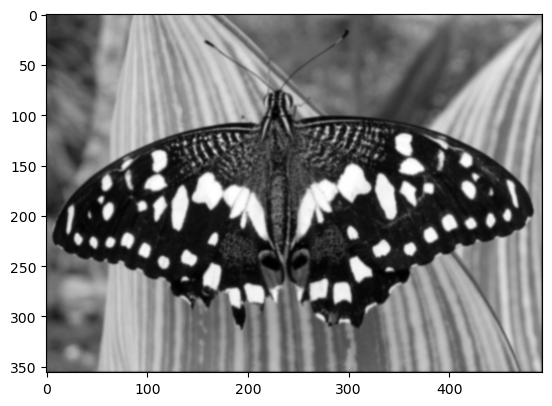

In [6]:
filtered_img = apply_filter(gray_img, build_gaussian_kernel(7, 1))
plt.imshow(filtered_img, cmap="gray")

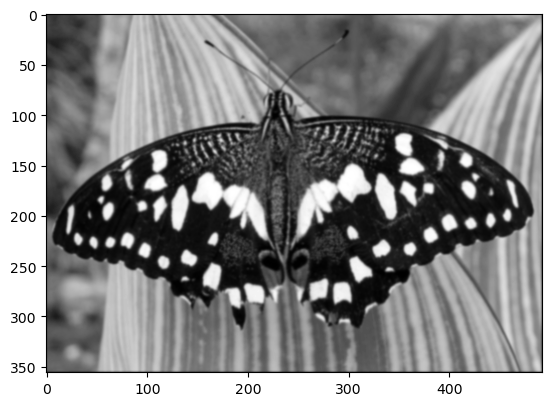

In [7]:
cv2_filtered_img = cv2.filter2D(gray_img, -1, build_gaussian_kernel(7, 1), borderType=cv2.BORDER_CONSTANT)
plt.imshow(cv2_filtered_img, cmap="gray")

In [8]:
"Test Passed" if np.mean((filtered_img - cv2_filtered_img) ** 2) < 5 else "Test Failed"

'Test Passed'

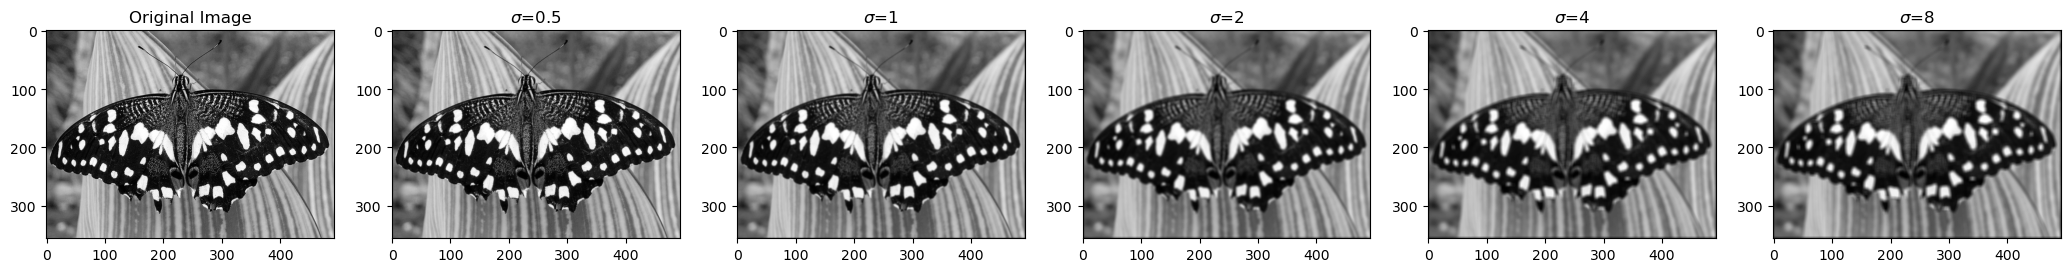

In [9]:
_, ax = plt.subplots(1, 1 + len(sigmas), figsize=(5 * len(sigmas) + 1, 5))
ax[0].imshow(gray_img, cmap="gray")
ax[0].set_title("Original Image")

for i, sigma in enumerate(sigmas):
    gaussian_filtered_img = apply_filter(gray_img, build_gaussian_kernel(7, sigma))
    ax[i + 1].imshow(gaussian_filtered_img, cmap="gray")
    ax[i + 1].set_title(rf"$\sigma$={sigma}")

Text(0.5, 1.0, 'Grad Y')

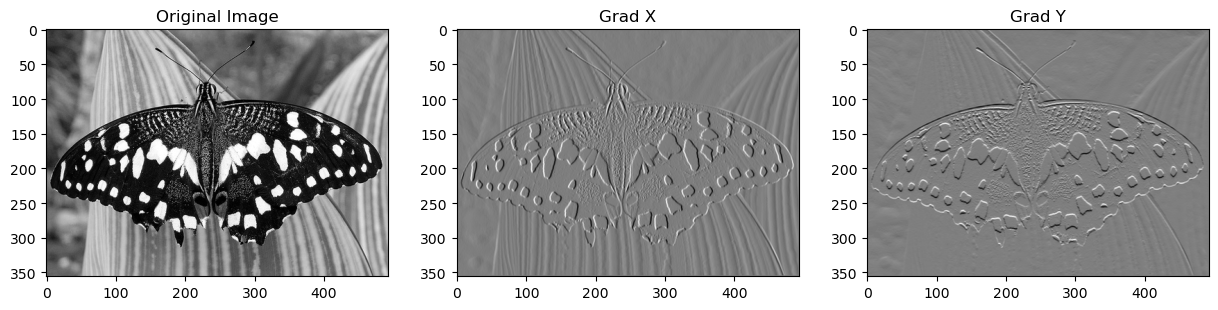

In [10]:
grad_x, grad_y = sobel_edge_detection(gray_img)
_, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray_img, cmap="gray")
axes[0].set_title("Original Image")
axes[1].imshow(grad_x, cmap="gray")
axes[1].set_title("Grad X")
axes[2].imshow(grad_y, cmap="gray")
axes[2].set_title("Grad Y")

In [11]:
smoothed_img = apply_filter(gray_img, build_gaussian_kernel(5, 1))
grad_x, grad_y = sobel_edge_detection(smoothed_img)
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
gradient_direction = (np.arctan2(grad_y, grad_x) * (180 / np.pi)) % 180

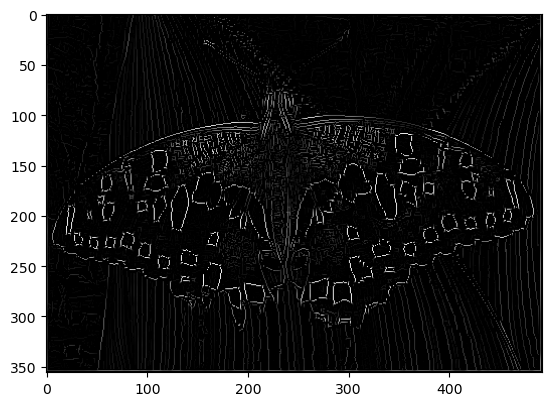

In [12]:
nms_result = non_maximum_suppression(gradient_magnitude, gradient_direction)
plt.imshow(nms_result, cmap="gray")

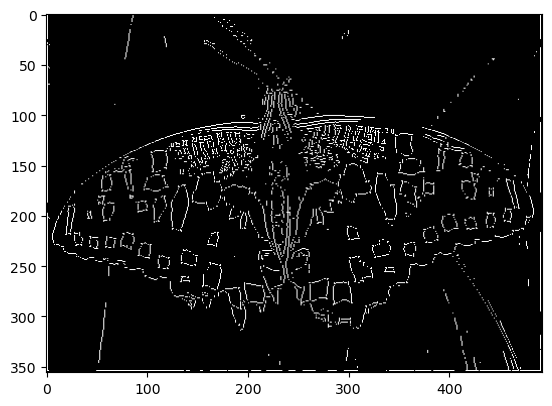

In [13]:
edges = double_thresholding(nms_result, low_threshold=50, high_threshold=150)
plt.imshow(edges, cmap="gray")